<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHÂN TÍCH DỮ LIỆU VỀ BÊN ĐÁI THÁO ĐƯỜNG**

## **Bạn đã bao giờ tự hỏi những yếu tố nào đóng vai trò quan trọng trong việc dự đoán nguy cơ mắc bệnh tiểu đường type 2? Liệu số lần mang thai, chỉ số BMI hay tiền sử gia đình có ảnh hưởng mạnh mẽ nhất? Và điều gì sẽ xảy ra nếu chúng ta muốn dự đoán khả năng mắc bệnh của một cá nhân trong vòng 5 năm tới?**

## **Bộ dữ liệu Pima Indians Diabetes có thể giúp bạn khám phá những câu hỏi đó!**
## **Tập dữ liệu này được thu thập từ cộng đồng người Pima ở Arizona (Mỹ), vốn có tỷ lệ mắc bệnh tiểu đường type 2 cao. Nó bao gồm các thông tin y tế như số lần mang thai, nồng độ glucose trong máu, huyết áp, độ dày da, nồng độ insulin, chỉ số BMI, yếu tố di truyền tiểu đường (Diabetes Pedigree Function) và tuổi. Nhãn mục tiêu cho biết liệu bệnh nhân có phát triển bệnh tiểu đường type 2 trong vòng 5 năm hay không.**

## **Với dữ liệu này, bạn có thể khám phá và phân tích để tìm ra những yếu tố nguy cơ then chốt, so sánh ảnh hưởng của các biến số, và xây dựng các mô hình dự báo (ví dụ logistic regression, random forest, neural networks) để hỗ trợ chẩn đoán sớm và phòng ngừa bệnh tiểu đường.**

In [2]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [3]:
# Import thư viện google colab để kết nối với google drive (link đã đưa vào nhóm, nhớ truy cập)
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Định nghĩa tên các cột dữ liệu dựa trên file .names để dễ đọc
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

**Ý nghĩa từng cột dữ liệu**
- Pregnancies: số lần mang thai
- Glucose: nồng độ glucose trong máu sau khi nhịn ăn 2 giờ
- BloodPressure: huyết áp tâm thu (mm Hg)
- SkinThickness: độ dày da ở vùng tam giác vai (mm)
- Insulin: nồng độ insulin trong máu sau khi nhịn ăn (mu U/ml)
- BMI: chỉ số khối cơ thể (kg/m^2)
- DiabetesPedigreeFunction: hàm di truyền bệnh tiểu đường
- Age: tuổi (năm)
- Outcome: kết quả chẩn đoán (1: có tiểu đường, 0: không có tiểu đường)

In [5]:
# đọc dữ liệu từ file csv trong link google drive
diabetes_df = pd.read_csv("/content/drive/MyDrive/PTDL 25-26/pima-indians-diabetes.data.csv", names=column_names)           # Reading the data file

In [6]:
# Hiển thị 5 dòng đầu tiên của dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Hiển thị thông tin tổng quan về dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Tổng quan về DataFrame:**
- Bao gồm: số lượng dòng, số lượng cột, tên cột, kiểu dữ liệu của từng cột, và số lượng giá trị không null trong mỗi cột.
- RangeIndex: có 768 dòng, đánh số từ 0 đến.
- Data columns (total 9 columns): có 9 cột dữ liệu.
- dtypes: int64(8), float64(1): có 8 cột kiểu int64 và 1 cột kiểu float64
- memory usage: 54.1 KB: bộ nhớ sử dụng để lưu trữ dataframe

In [8]:
# Hiển thị các thống kê mô tả cơ bản của dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hiển thị các thống kê mô tả cơ bản của dataframe**
- Các thống kê mô tả cơ bản bao gồm số lượng giá trị không null, trung bình, độ lệch chuẩn, giá trị min, các phần trăm vị trí (25%, 50%, 75%), và giá trị max cho mỗi cột số
- count: số lượng giá trị không null trong mỗi cột
- mean: giá trị trung bình của mỗi cột
- std: độ lệch chuẩn của mỗi cột
- min: giá trị nhỏ nhất trong mỗi cột
- 25%: giá trị tại vị trí phần trăm thứ 25 trong mỗi cột
- 50%: giá trị tại vị trí phần trăm thứ 50 (trung vị) trong mỗi cột
- 75%: giá trị tại vị trí phần trăm thứ 75 trong mỗi cột
- max: giá trị lớn nhất trong mỗi cột  
**=> Các thống kê này giúp hiểu rõ hơn về phân phối và phạm vi của dữ liệu trong mỗi cột**

Chúng ta thấy rằng tập dữ liệu có 9 cột và 768 hàng. Tất cả các cột đều có đủ 768 giá trị không rỗng, cho thấy không có giá trị thiếu (null values) rõ ràng trong tập dữ liệu.

In [9]:
# Tạo một bản sao của dataframe để tránh thay đổi dữ liệu gốc
df1 = diabetes_df.copy()

Trước hết, chúng ta sẽ cố gắng hiểu ý nghĩa của tất cả các cột trong khung dữ liệu.
Để làm được điều này, chúng ta sẽ xem xét các giá trị duy nhất đạt được bởi mỗi cột mà chúng ta không thể hiểu được ý nghĩa của chúng.

In [10]:
# Kiểm tra các giá trị duy nhất trong cột 'Pregnancies'
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [11]:
# Kiểm tra các giá trị duy nhất trong cột 'Glucose'
df1['Glucose'].unique() #cột này có giá trị 0

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [12]:
# Kiểm tra các giá trị duy nhất trong cột 'BloodPressure'
df1['BloodPressure'].unique() # cột này có giá trị 0

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [13]:
# Kiểm tra các giá trị duy nhất trong cột 'SkinThickness'
df1['SkinThickness'].unique() #cột này có giá trị 0

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'Insulin'
df1['Insulin'].unique() #cột này có giá trị 0

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [15]:
# Kiểm tra các giá trị duy nhất trong cột 'BMI'
df1['BMI'].unique() # có giá tri 0

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [16]:
# Kiểm tra các giá trị duy nhất trong cột 'DiabetesPedigreeFunction'
df1['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [17]:
# Kiểm tra các giá trị duy nhất trong cột 'Age'
df1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [18]:
# Kiểm tra các giá trị duy nhất trong cột 'Outcome'
df1['Outcome'].unique()

array([1, 0])

## **Clean data**

Làm sạch dữ liệu là một bước quan trọng trước khi Phân tích Khám phá Dữ liệu (EDA) vì nó sẽ loại bỏ các dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả của EDA.

Trong quá trình làm sạch dữ liệu, chúng ta sẽ thực hiện các bước sau:

+ Loại bỏ các hàng trùng lặp.

+ Xử lý các giá trị bị thiếu.

+ Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.

+ Thêm các cột quan trọng (nếu cần).

### **Bước 1: Loại bỏ trùng lặp**

In [19]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Kết quả: (0, 9): 0 dòng, 9 cột  
=> Bảng dữ liệu không có dữ liệu trùng lặp

In [20]:
# Hiển thị kích thước của dataframe
df1.shape

(768, 9)

Bảng dữ liệu có 768 hàng và 9 cột

### **Bước 2: Xử lý các giá trị bị thiếu**

In [21]:
# Cột có giá trị thiếu
df1.isnull().sum().sort_values(ascending = False)[:6]

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Không có giá trị thiếu trong các cột dữ liệu

Tuy nhiên. Vì các cột dữ liệu "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" có dữ liệu '0' được xem là dữ liệu thiếu (vì các giá trị này không thể bằng 0) nên chúng ta sẽ thay thế chúng bằng giá trị trung vị để tránh ảnh hưởng bởi các giá trị ngoại lai

- Giá trị trung vị (median) là giá trị ở giữa khi các giá trị được sắp xếp theo thứ tự  
Ví dụ: trong cột 'Glucose', nếu có các giá trị [0, 85, 90, 95, 100], giá trị trung vị là 90
- Giá trị ngoại lai (outliers) là các giá trị nằm xa so với phần lớn các giá trị khác trong tập dữ liệu  
Ví dụ: trong cột 'Insulin', nếu có các giá trị [0, 15, 20, 25, 300], giá trị 300 là một giá trị ngoại lai vì nó nằm xa so với các giá trị khác
- Việc sử dụng giá trị trung vị giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai này khi thay thế các giá trị 0, giúp duy trì tính toàn vẹn của dữ liệu, tránh việc làm sai lệch các phân tích sau này

In [22]:
# Danh sách các cột có giá trị 0 cần xử lý
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Duyệt qua từng cột và thay thế giá trị 0 bằng giá trị trung vị
for column in columns_to_process:
    # Lấy giá trị trung vị của cột, bỏ qua các giá trị 0
    median_value = df1[df1[column] != 0][column].median()

    # Thay thế các giá trị 0 bằng giá trị trung vị
    df1[column] = df1[column].replace(0, median_value)

In [23]:
# Kiểm tra lại các cột để đảm bảo không còn giá trị 0
print(df1[columns_to_process].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Hàng "min" của các cột dữ liệu "Glucose" "BloodPressure" "SkinThickness" "Insulin" "BMI" đều có giá trị >0. Vì vậy các cột này đã được xử lý các dữ liệu thiếu

### **Bước 3: Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.**

Sau khi kiểm tra cấu trúc dữ liệu, các kiểu dữ liệu của từng cột đã được xác định là phù hợp với nội dung của chúng (số nguyên cho các biến đếm và số thực cho các chỉ số). Do đó, không cần thực hiện bất kỳ thay đổi nào đối với kiểu dữ liệu. Bước này xác nhận rằng dữ liệu đã sẵn sàng cho quá trình phân tích tiếp theo.

### **Bước 4: Thêm các cột quan trọng.**

In [24]:
import pandas as pd

# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df

# Tạo cột phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Gầy'
    elif 18.5 <= bmi < 24.9:
        return 'Bình thường'
    elif 24.9 <= bmi < 29.9:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(classify_bmi)

# Tạo cột phân loại Glucose
def classify_glucose(glucose):
    if glucose < 110:
        return 'Bình thường'
    elif 110 <= glucose < 126:
        return 'Tiền tiểu đường'
    else:
        return 'Tiểu đường'

df1['Glucose_Category'] = df1['Glucose'].apply(classify_glucose)


# Tạo một hàm đơn giản để phân loại chỉ số DiabetesPedigreeFunction
def classify_pedigree(score):
    if score >= 0.5:
        return 'Nguy cơ cao'
    else:
        return 'Nguy cơ thấp'

# Áp dụng hàm để tạo cột mới 'Family_History'
df1['Family_History'] = df1['DiabetesPedigreeFunction'].apply(classify_pedigree)

In [25]:
# Hiển thị 5 dòng đầu tiên của dataframe
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Category,Family_History
0,6,148,72,35,125,33.6,0.627,50,1,Béo phì,Tiểu đường,Nguy cơ cao
1,1,85,66,29,125,26.6,0.351,31,0,Thừa cân,Bình thường,Nguy cơ thấp
2,8,183,64,29,125,23.3,0.672,32,1,Bình thường,Tiểu đường,Nguy cơ cao
3,1,89,66,23,94,28.1,0.167,21,0,Thừa cân,Bình thường,Nguy cơ thấp
4,0,137,40,35,168,43.1,2.288,33,1,Béo phì,Tiểu đường,Nguy cơ cao


Việc thêm các cột phân loại như BMI_Category, Glucose_Category và Family_History giúp chúng ta chuyển đổi dữ liệu thô thành các nhóm có ý nghĩa lâm sàng. Các cột này làm nổi bật mối liên hệ giữa tình trạng cân nặng, mức đường huyết, tiền sử gia đình và nguy cơ mắc bệnh tiểu đường của bệnh nhân.

## **EDA**

Trước tiên, hãy tìm mối tương quan giữa các dữ liệu số.

Vì các cột như Outcome là dữ liệu phân loại, nên chúng ta sẽ không cần kiểm tra mối tương quan giữa chúng với nhau (Outcome chỉ dùng làm biến mục tiêu).

Ngoài ra, một số cột đã thể hiện thông tin tổng hợp, ví dụ: nếu tính được BMI đã phản ánh cân nặng và chiều cao, nên có thể loại bỏ các cột thừa như cân nặng (Weight), chiều cao (Height) để tránh trùng lặp.

In [26]:
num_df = df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

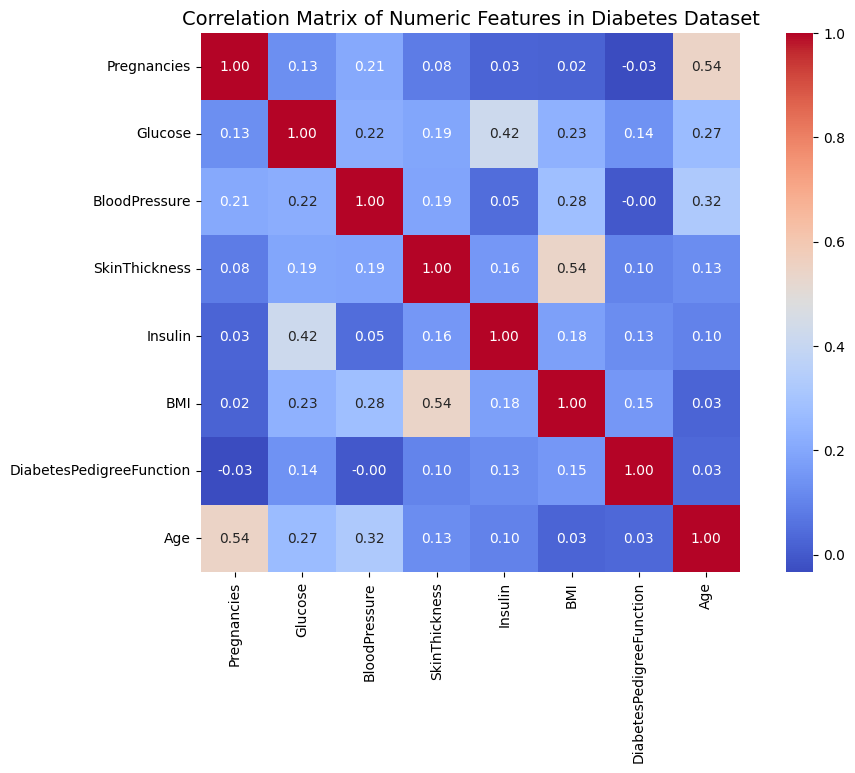

In [27]:
# Tính ma trận tương quan
corrmat = num_df.corr()

# Vẽ heatmap
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={'size': 10}, vmax=1, square=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features in Diabetes Dataset', fontsize=14)
plt.show()

Age và Pregnancies có mối tương quan 0.54
→ Điều này có nghĩa là tuổi bệnh nhân càng cao thì số lần mang thai càng nhiều. Đây là mối quan hệ hợp lý vì phụ nữ lớn tuổi có nhiều cơ hội mang thai hơn trong đời.

BMI và SkinThickness có mối tương quan 0.54
→ Điều này có nghĩa là bệnh nhân có chỉ số khối cơ thể (BMI) cao thường có độ dày da ở vùng tam giác vai lớn hơn. Đây cũng hợp lý, vì BMI cao thường đi kèm với dự trữ mỡ dưới da nhiều hơn, dẫn đến SkinThickness lớn hơn.

### **(1) Phân tích nhân khẩu học (Demographic Analysis)**


**Phân tích nhân khẩu học** (Demographic Analysis) là việc tìm hiểu và mô tả các đặc điểm của con người trong tập dữ liệu, như tuổi, giới tính, số lần mang thai, chỉ số BMI…
Mục đích là hiểu đặc điểm dân số, xác định xu hướng và mối quan hệ giữa các yếu tố cá nhân với kết quả nghiên cứu (ví dụ: mắc tiểu đường hay không).
- Đơn biến (Univariate Analysis): Xem xét một yếu tố tại một thời điểm, ví dụ: tuổi trung bình, số lần mang thai trung bình, nhóm tuổi phổ biến nhất.
- Nhị biến (Bivariate Analysis): Xem mối quan hệ giữa hai yếu tố, ví dụ: tuổi và số lần mang thai, tuổi và kết quả tiểu đường (Outcome).
- Đa biến (Multivariate Analysis): Xem mối quan hệ giữa nhiều yếu tố cùng lúc, ví dụ: tuổi cao + nhiều lần mang thai có liên quan đến tỷ lệ tiểu đường cao không.

#### **Đơn biến**

**Q1) Tuổi trung bình của bệnh nhân là bao nhiêu?**

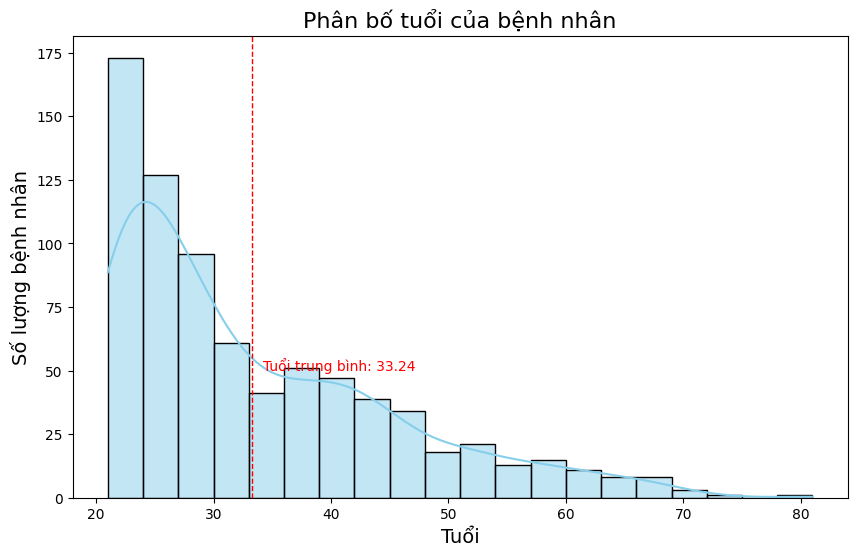

In [49]:
# Biểu đồ histogram thể hiện phân bố tuổi của bệnh nhân.
# Đường màu đỏ đứng yên thể hiện tuổi trung bình của bệnh nhân.
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố tuổi của bệnh nhân', fontsize=16)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['Age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['Age'].mean()+1, 50, f'Tuổi trung bình: {df1["Age"].mean():.2f}', color='red')
plt.show()

- Biểu đồ cho thấy phân bố tuổi của bệnh nhân trong dataset. Chúng ta có thể thấy rằng phần lớn bệnh nhân nằm trong khoảng tuổi từ 20 đến 40, sau đó số lượng bệnh nhân giảm dần.
- Tuổi trung bình: Đường màu đỏ đứng yên thể hiện tuổi trung bình của bệnh nhân, khoảng 33.24 tuổi. Điều này cho thấy rằng bệnh tiểu đường có thể ảnh hưởng đến người trẻ tuổi hơn so với quan niệm phổ biến rằng nó chủ yếu ảnh hưởng đến người lớn tuổi.  

**Q2) Nhóm tuổi nào chiếm tỷ lệ cao nhất trong tập dữ liệu?**

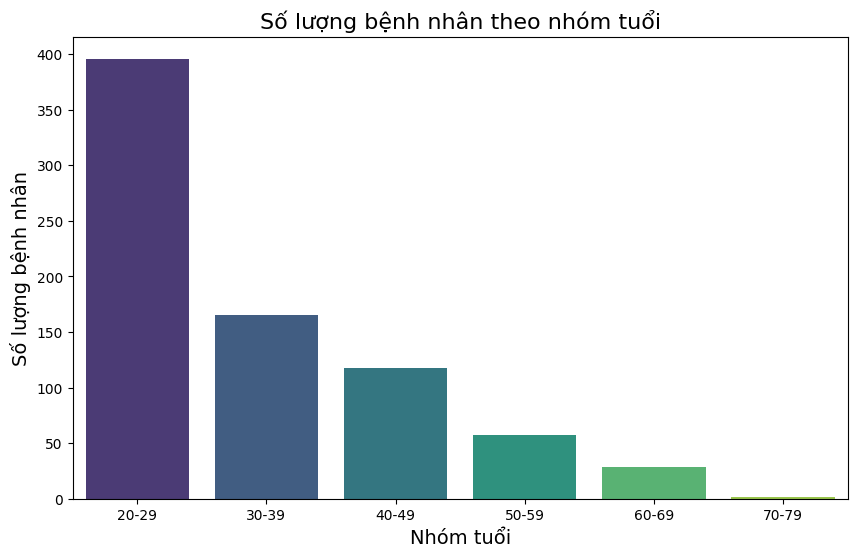

In [30]:
# biểu đồ Cột hiển thị số lượng bệnh nhân trong mỗi nhóm tuổi.
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df1['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis', hue=age_group_counts.index, legend=False)
plt.title('Số lượng bệnh nhân theo nhóm tuổi', fontsize=16)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.show()

- Nhóm tuổi chiếm tỷ lệ cao nhất: Biểu đồ cho thấy nhóm tuổi 20-29 chiếm số lượng bệnh nhân cao nhất trong tập dữ liệu. Điều này có thể phản ánh xu hướng gia tăng bệnh tiểu đường ở người trẻ tuổi, có thể do lối sống không lành mạnh, chế độ ăn uống kém và thiếu hoạt động thể chất.
- Biểu đồ cũng cho thấy sự phân bố số lượng bệnh nhân trong các nhóm tuổi khác nhau. Mặc dù nhóm tuổi 20-29 chiếm số lượng cao nhất, nhưng các nhóm tuổi khác cũng có sự hiện diện đáng kể, cho thấy bệnh tiểu đường ảnh hưởng đến nhiều lứa tuổi khác nhau.    

→ **Kết quả của Q1 và Q2**: Bệnh tiểu đường không chỉ ảnh hưởng đến người lớn tuổi mà còn có xu hướng gia tăng ở người trẻ tuổi. Điều này nhấn mạnh tầm quan trọng của việc nâng cao nhận thức về bệnh tiểu đường và thúc đẩy lối sống lành mạnh trong tất cả các nhóm tuổi để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

**Q3) Trung bình số lần mang thai của bệnh nhân là bao nhiêu?**

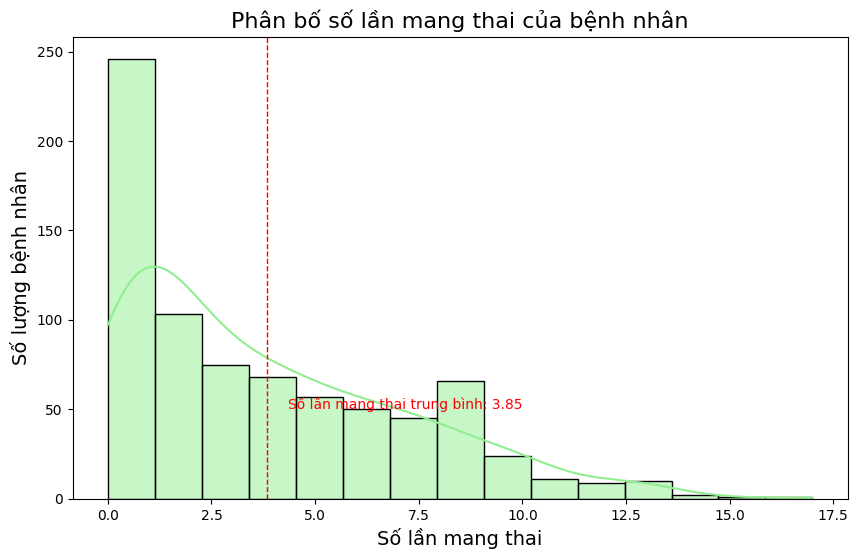

In [31]:
# Biểu đồ histogram thể hiện phân bố số lần mang thai của bệnh nhân.
# Đường màu đỏ đứng yên thể hiện số lần mang thai trung bình của bệnh nhân.
plt.figure(figsize=(10, 6))
sns.histplot(df1['Pregnancies'], bins=15, kde=True, color='lightgreen')
plt.title('Phân bố số lần mang thai của bệnh nhân', fontsize=16)
plt.xlabel('Số lần mang thai', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['Pregnancies'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['Pregnancies'].mean()+0.5, 50, f'Số lần mang thai trung bình: {df1["Pregnancies"].mean():.2f}', color='red')
plt.show()

- Biểu đồ cho thấy phân bố số lần mang thai của bệnh nhân trong dataset. Chúng ta có thể thấy rằng phần lớn bệnh nhân có từ 0 đến 5 lần mang thai, với một số ít bệnh nhân có số lần mang thai cao hơn.
- Số lần mang thai trung bình: Đường màu đỏ đứng yên thể hiện số lần mang thai trung bình của bệnh nhân, khoảng 3.85 lần. Điều này cho thấy rằng số lần mang thai không quá cao trong nhóm bệnh nhân này.  
→ **Kết quả**: Số lần mang thai trung bình của bệnh nhân trong dataset là khoảng 3.85 lần. Điều này nhấn mạnh tầm quan trọng của việc theo dõi và quản lý sức khỏe sinh sản, đặc biệt là đối với những phụ nữ có nguy cơ mắc bệnh tiểu đường. Việc duy trì lối sống lành mạnh và kiểm tra sức khỏe định kỳ có thể giúp phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

**Q4) Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) chiếm bao nhiêu phần trăm?**

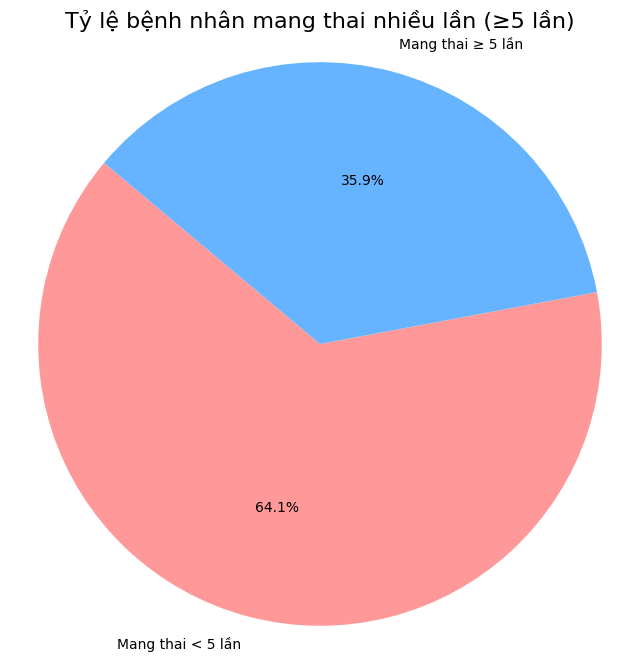

In [34]:
# Biểu đồ tròn thể hiện tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) so với tổng số bệnh nhân trong dataset.
# Biểu đồ tròn thể hiện tỷ lệ rõ ràng.
pregnancy_counts = df1['Pregnancies'].value_counts()
pregnancy_5_or_more = pregnancy_counts[pregnancy_counts.index >= 5].sum()
pregnancy_less_than_5 = pregnancy_counts[pregnancy_counts.index < 5].sum()
labels = ['Mang thai < 5 lần', 'Mang thai ≥ 5 lần']
sizes = [pregnancy_less_than_5, pregnancy_5_or_more]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần)', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

- Biểu đồ cho thấy tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) chiếm khoảng 35.9% tổng số bệnh nhân trong dataset. Điều này cho thấy một phần đáng kể bệnh nhân có tiền sử mang thai nhiều lần, điều này có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.  
→ **Kết quả**: Nhấn mạnh tầm quan trọng của việc theo dõi và quản lý sức khỏe sinh sản, đặc biệt là đối với những phụ nữ có nguy cơ mắc bệnh tiểu đường. Việc duy trì lối sống lành mạnh và kiểm tra sức khỏe định kỳ có thể giúp phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


#### **Nhị biến**

**Q1) Có mối quan hệ gì giữa số lần mang thai và độ tuổi bệnh nhân?**

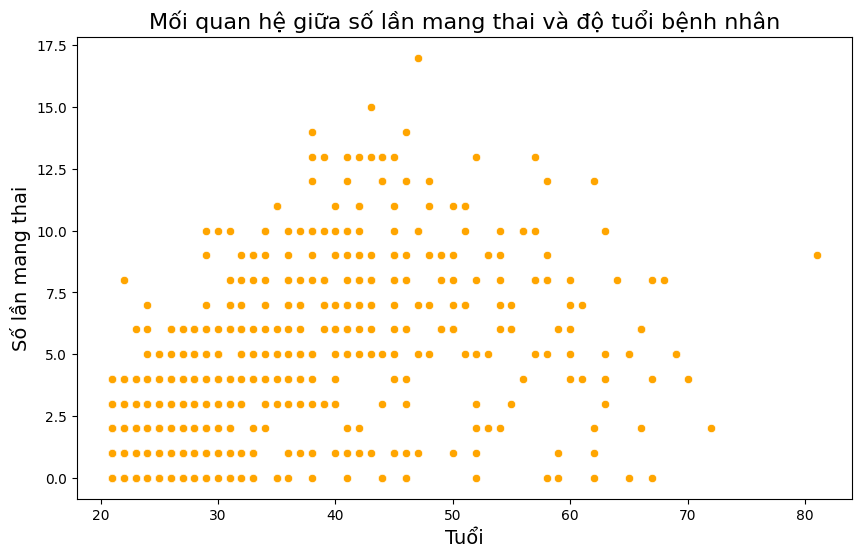

In [35]:
# Biểu đồ scatter plot thể hiện mối quan hệ giữa số lần mang thai và độ tuổi bệnh nhân trong dataset.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', data=df1, color='orange')
plt.title('Mối quan hệ giữa số lần mang thai và độ tuổi bệnh nhân', fontsize=16)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số lần mang thai', fontsize=14)
plt.show()

- Biểu đồ cho thấy mối quan hệ tích cực giữa số lần mang thai và độ tuổi bệnh nhân. Cụ thể, khi độ tuổi tăng lên, số lần mang thai cũng có xu hướng tăng theo. Điều này phản ánh thực tế rằng phụ nữ có xu hướng mang thai nhiều lần hơn khi họ lớn tuổi hơn.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu khá rộng, với một số bệnh nhân trẻ tuổi có số lần mang thai cao và ngược lại. Điều này cho thấy rằng số lần mang thai không chỉ phụ thuộc vào độ tuổi mà còn có thể bị ảnh hưởng bởi các yếu tố khác như tình trạng sức khỏe, lối sống và các yếu tố xã hội.  
→ **Kết quả**: Có một mối quan hệ tích cực giữa số lần mang thai và độ tuổi bệnh nhân. Điều này nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe sinh sản và tư vấn về kế hoạch hóa gia đình, đặc biệt là đối với những phụ nữ lớn tuổi hơn. Việc duy trì lối sống lành mạnh và kiểm tra sức khỏe định kỳ có thể giúp phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

**Q2) Tuổi có ảnh hưởng trực tiếp đến Outcome không?**

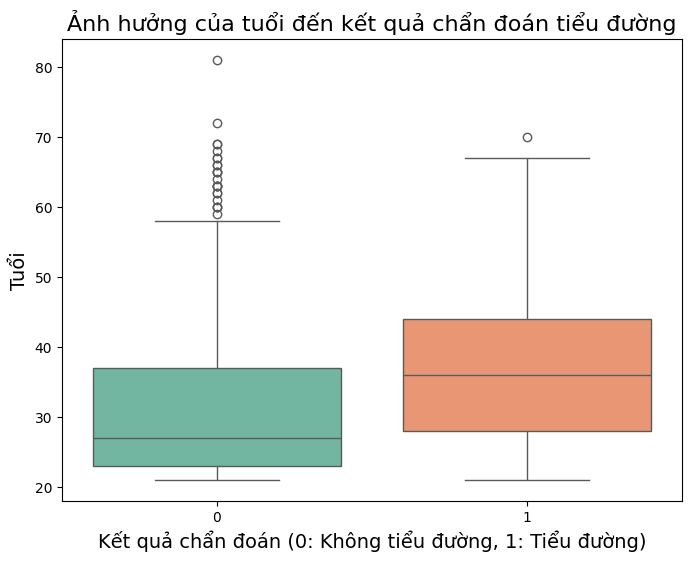

In [43]:
# Boxplot thể hiện sự phân bố tuổi của bệnh nhân dựa trên kết quả chẩn đoán tiểu đường (Outcome).
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df1, palette='Set2', hue='Outcome', legend=False)
plt.title('Ảnh hưởng của tuổi đến kết quả chẩn đoán tiểu đường', fontsize=16)
plt.xlabel('Kết quả chẩn đoán (0: Không tiểu đường, 1: Tiểu đường)', fontsize=14)
plt.ylabel('Tuổi', fontsize=14)
plt.show()

- Biểu đồ cho thấy sự khác biệt rõ rệt về tuổi giữa hai nhóm bệnh nhân, nhóm không bị tiểu đường (Outcome = 0) có độ tuổi trung bình thấp hơn so với nhóm bị tiểu đường (Outcome = 1). Điều này cho thấy tuổi có thể là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu trong mỗi nhóm. Nhóm không bị tiểu đường có sự phân bố tuổi rộng hơn, trong khi nhóm bị tiểu đường có sự tập trung tuổi cao hơn. Điều này có thể phản ánh thực tế rằng bệnh tiểu đường thường xuất hiện ở những người lớn tuổi hơn.  
→ **Kết quả**: Tuổi có ảnh hưởng trực tiếp đến kết quả chẩn đoán tiểu đường. Người lớn tuổi có nguy cơ cao hơn bị tiểu đường so với người trẻ tuổi. Điều này nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe định kỳ và duy trì lối sống lành mạnh, đặc biệt là đối với những người lớn tuổi, để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.




#### **Đa biến**

**Q1) Nhóm phụ nữ nhiều Pregnancies và tuổi cao có tỷ lệ tiểu đường cao hơn không?**

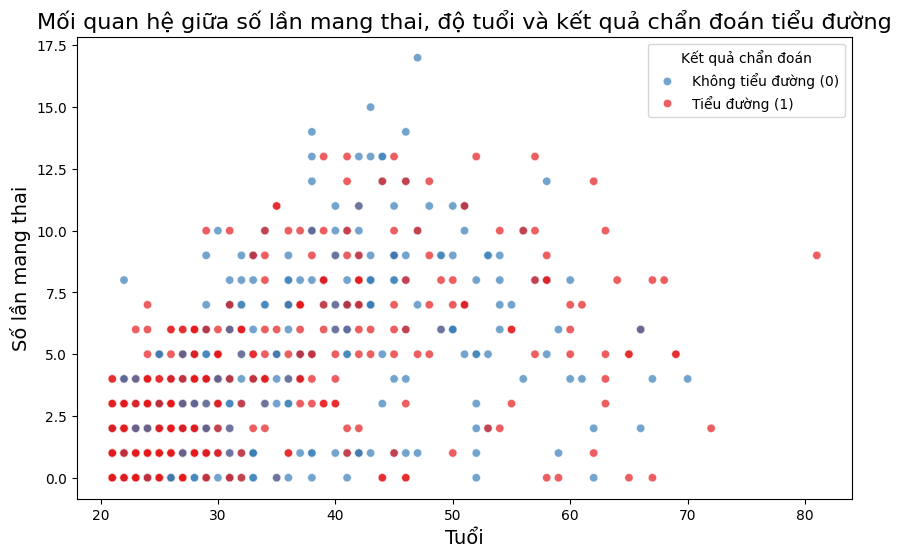

In [45]:
# Biểu đồ scatter plot thể hiện mối quan hệ giữa số lần mang thai, độ tuổi và kết quả chẩn đoán tiểu đường (Outcome).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df1, palette='Set1', alpha=0.7)
plt.title('Mối quan hệ giữa số lần mang thai, độ tuổi và kết quả chẩn đoán tiểu đường', fontsize=16)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số lần mang thai', fontsize=14)
plt.legend(title='Kết quả chẩn đoán', labels=['Không tiểu đường (0)', 'Tiểu đường (1)'])
plt.show()

- Biểu đồ cho thấy rằng nhóm phụ nữ có số lần mang thai cao và độ tuổi lớn hơn có xu hướng có tỷ lệ tiểu đường cao hơn (Outcome = 1). Điều này phản ánh thực tế rằng cả số lần mang thai và độ tuổi đều có thể là các yếu tố nguy cơ đối với bệnh tiểu đường.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu trong mỗi nhóm. Nhóm không bị tiểu đường có sự phân bố tuổi và số lần mang thai rộng hơn, trong khi nhóm bị tiểu đường có sự tập trung tuổi và số lần mang thai cao hơn. Điều này có thể phản ánh thực tế rằng bệnh tiểu đường thường xuất hiện ở những người lớn tuổi hơn và có lịch sử mang thai nhiều hơn.   
→ **Kết quả**: Nhóm phụ nữ có số lần mang thai cao và độ tuổi lớn hơn có tỷ lệ tiểu đường cao hơn. Điều này nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe định kỳ và duy trì lối sống lành mạnh, đặc biệt là đối với những phụ nữ lớn tuổi và có lịch sử mang thai nhiều, để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

### **(2) Phân tích chỉ số cơ thể (BMI Analysis)**

#### **Đơn biến**

**Q1) Giá trị BMI trung bình là bao nhiêu?**

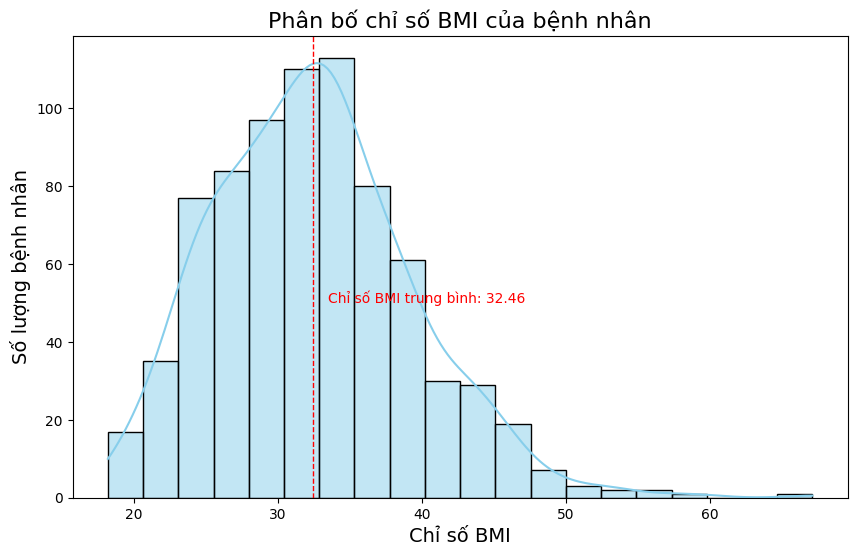

In [50]:
# Biểu đồ histogram thể hiện phân bố của chỉ số BMI trong tập dữ liệu.
plt.figure(figsize=(10, 6))
sns.histplot(df1['BMI'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố chỉ số BMI của bệnh nhân', fontsize=16)
plt.xlabel('Chỉ số BMI', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['BMI'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['BMI'].mean()+1, 50, f'Chỉ số BMI trung bình: {df1["BMI"].mean():.2f}', color='red')
plt.show()

- Biểu đồ cho thấy phân bố của chỉ số BMI trong tập dữ liệu. Phần lớn bệnh nhân có chỉ số BMI nằm trong khoảng từ 20 đến 35, với một số ít bệnh nhân có chỉ số BMI rất cao (trên 40).
- Đường thẳng màu đỏ trên biểu đồ đại diện cho giá trị trung bình của chỉ số BMI, được hiển thị là khoảng 32.46. Điều này cho thấy rằng trung bình bệnh nhân trong tập dữ liệu có chỉ số BMI nằm trong phạm vi thừa cân hoặc béo phì, điều này có thể liên quan đến nguy cơ mắc bệnh tiểu đường.  
→ **Kết quả**: Chỉ số BMI trung bình của bệnh nhân trong tập dữ liệu là khoảng 32.46, cho thấy rằng nhiều bệnh nhân có nguy cơ cao mắc bệnh tiểu đường do thừa cân hoặc béo phì. Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

**Q2) Tỷ lệ bệnh nhân thừa cân và béo phì?**

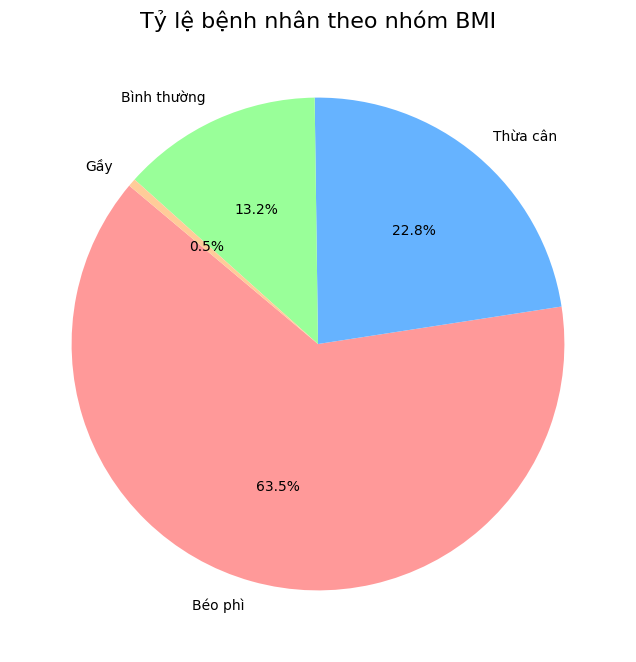

In [51]:
# Biểu đồ pie chart thể hiện tỷ lệ phần trăm của các nhóm BMI trong tập dữ liệu.
bmi_counts = df1['BMI_Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tỷ lệ bệnh nhân theo nhóm BMI', fontsize=16)
plt.show()

- Biểu đồ cho thấy tỷ lệ phần trăm của các nhóm BMI trong tập dữ liệu. Chúng ta có thể thấy rằng nhóm "Béo phí" chiếm tỷ lệ lớn nhất, tiếp theo là nhóm "Thừa cân", trong khi nhóm "Gầy" chiếm tỷ lệ nhỏ nhất. Điều này phản ánh thực tế rằng nhiều bệnh nhân trong tập dữ liệu có nguy cơ cao mắc bệnh tiểu đường do thừa cân hoặc béo phì.  
→ **Kết quả**: Tỷ lệ bệnh nhân thừa cân và béo phì trong tập dữ liệu là khá cao. Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


#### **Nhị biến**

**Q1) BMI ảnh hưởng thế nào đến khả năng mắc tiểu đường (Outcome)?**

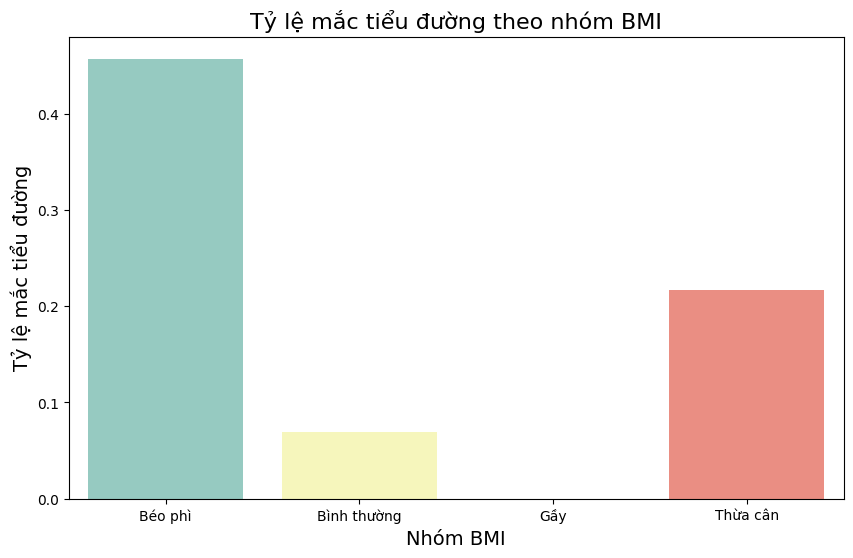

In [54]:
# Biểu đồ bar chart thể hiện tỷ lệ mắc tiểu đường (Outcome) trong từng nhóm BMI.
bmi_outcome = df1.groupby('BMI_Category')['Outcome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Outcome', data=bmi_outcome, palette='Set3', hue='BMI_Category', legend=False)
plt.title('Tỷ lệ mắc tiểu đường theo nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI', fontsize=14)
plt.ylabel('Tỷ lệ mắc tiểu đường', fontsize=14)
plt.show()

- Biểu đồ cho thấy tỷ lệ mắc tiểu đường trong từng nhóm BMI. Chúng ta có thể thấy rằng nhóm "Béo phì" có tỷ lệ mắc tiểu đường cao nhất, tiếp theo là nhóm "Thừa cân", trong khi nhóm "Gầy" hầu như là không có. Điều này phản ánh thực tế rằng chỉ số BMI cao hơn có liên quan đến nguy cơ mắc bệnh tiểu đường.  
→ **Kết quả**: Chỉ số BMI ảnh hưởng đáng kể đến khả năng mắc tiểu đường. Những người trong nhóm "Béo phì" và "Thừa cân" có nguy cơ cao hơn mắc bệnh tiểu đường so với những người trong nhóm "Bình thường". Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


**Q2) Nồng độ glucose thay đổi theo BMI như thế nào?**

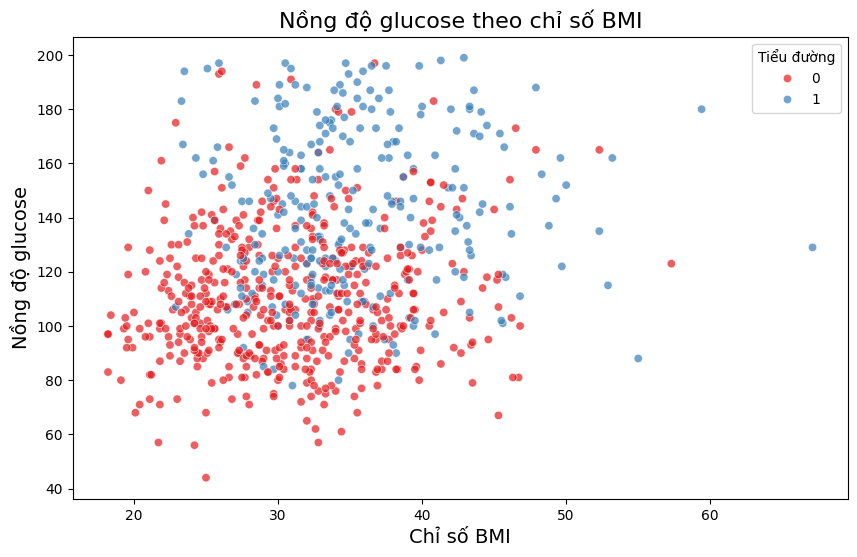

In [55]:
# Biểu đồ scatter plot thể hiện mối quan hệ giữa chỉ số BMI và nồng độ glucose trong máu, với màu sắc biểu thị tình trạng tiểu đường (Outcome).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df1, palette='Set1', alpha=0.7)
plt.title('Nồng độ glucose theo chỉ số BMI', fontsize=16)
plt.xlabel('Chỉ số BMI', fontsize=14)
plt.ylabel('Nồng độ glucose', fontsize=14)
plt.legend(title='Tiểu đường', loc='upper right')
plt.show()


- Biểu đồ cho thấy một mối quan hệ tích cực giữa chỉ số BMI và nồng độ glucose trong máu. Cụ thể, khi chỉ số BMI tăng lên, nồng độ glucose cũng có xu hướng tăng theo. Điều này phản ánh thực tế rằng thừa cân và béo phì có thể làm tăng nguy cơ mắc bệnh tiểu đường do ảnh hưởng đến khả năng kiểm soát đường huyết.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu khá rộng, với một số bệnh nhân có chỉ số BMI cao nhưng nồng độ glucose thấp và ngược lại. Điều này cho thấy rằng nồng độ glucose không chỉ phụ thuộc vào chỉ số BMI mà còn có thể bị ảnh hưởng bởi các yếu tố khác như di truyền, lối sống và chế độ ăn uống.  
→ **Kết quả**: Nồng độ glucose trong máu có xu hướng tăng khi chỉ số BMI tăng lên. Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.